# Objective 03 - Express and explain the intuition and interpretation of logistic regression
## Overview
So far in this sprint, we have been fitting linear regression models to continuous data and predicting a numeric value. In this next part of the module, we're going to be implementing a classification model where we predict the class a given observation belongs to. One of the most basic classification techniques is called a logistic regression. Don't confuse linear regression with logistic regression: one is a regression and one is a classification.

## Logistic Regression
A logistic regression classifier is based on the sigmoid function which is an s-shaped curve. The equation for the sigmoid is given by:

\sigma(x) = \frac{1}{1+exp(-x)}

We’ll plot this function and then discuss why it’s shape makes it suitable for a binary classification problem.

In [1]:
# The logistic sigmoid function (implemented to accept numpy arrays)
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.e**(-x))

Text(0.5, 1.0, 'Sigmoid function')

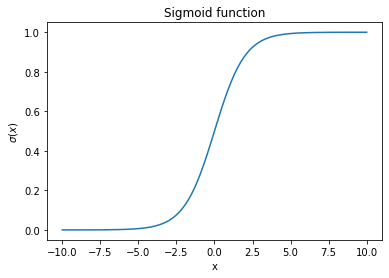

In [2]:
# Plot the function

x_plot = np.linspace(-10, 10, 100)
sig_y = sigmoid(x_plot)

# Imports for plotting
import matplotlib.pyplot as plt

# Plot the function generated above
plt.plot(x_plot, sig_y)
plt.xlabel('x'); plt.ylabel('$\sigma(x)$')
plt.title('Sigmoid function')

# plt.clf()

Over most of the range of the sigmoid function, the value is either 0 or 1, which is why this function is particularly suitable for a binary classifier. When we are fitting a model, we would like to find the coefficients that best fit the data. Including these coefficients results in an equation of this form:

P(y_i = 1) = \frac{1}{1+e^{-(\beta_0+\beta_1x)}}

where P(y_i=1) is the probability of observation i being in class 1. The coefficients \beta_0 and \beta_1 determine the shape of the function and are what we are trying to fit when we model our data. When we know the coefficients, we can make a prediction of the class for an observation x.

Follow Along

In [3]:
# Import seaborn and load the data
import seaborn as sns

geyser = sns.load_dataset("geyser")

# Choose one feature - we'll use the duration
x = geyser['duration']

# Import the label encoder and encode the 'kind' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Create a new column with 0=long and 1=short class labels
geyser['kind_binary'] = le.fit_transform(geyser['kind'])
display(geyser.head())

# Assign the target variable to y
y = geyser['kind_binary']

,duration,waiting,kind,kind_binary
0,3.600,79,long,0
1,1.800,54,short,1
2,3.333,74,long,0
3,2.283,62,short,1
4,4.533,85,long,0


We now have a DataFrame with a column encoded with two classes: long=0 and short=1. Let's plot the duration column against the binary classes we just created.

Text(0.5, 1.0, 'Geyser duration')

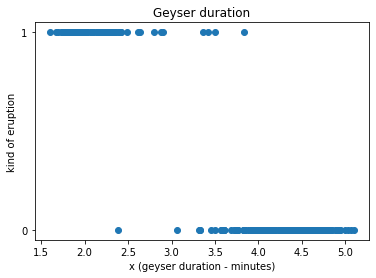

In [4]:
# Plot the data for 'duration'
plt.scatter(x, y)
plt.yticks([0, 1])
plt.xlabel('x (geyser duration - minutes)'); plt.ylabel('kind of eruption')
plt.title('Geyser duration')

#plt.clf()

Now, let's use the sigmoid function with coefficients from a model that fits the above data. We'll get to this step in the next objective so for now let's just focus on what the coefficient mean and how to interpret the result. We'll assign the coefficients to variables and then plot the new function on our data above.

Text(0.5, 1.0, 'Geyser eruption with model')

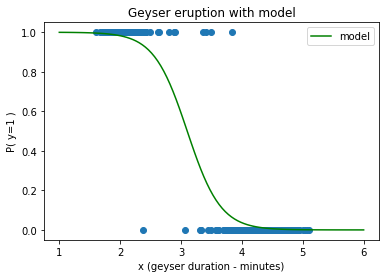

In [5]:
# Assign coefficient from previously fit model
beta_0 = 11.32
beta_1 = -3.65

# Define the sigmoid with the coefficients
def sigmoid_beta(x, beta_0, beta_1):
    exp = beta_0 + beta_1*x
    return 1 / (1 + np.e**(-exp))

x_model_plot = np.linspace(1, 6, 100)
y_model = sigmoid_beta(x_model_plot, beta_0, beta_1)

# Plot the function generated above
plt.scatter(x, y)
plt.plot(x_model_plot, y_model, color='green', label='model')
plt.xlabel('x (geyser duration - minutes)'); plt.ylabel('P( y=1 )')
plt.legend()
plt.title('Geyser eruption with model')

#plt.clf()

In [ ]:
Now let's use our function with the model parameters to make and interpret a prediction. We'll pretend that we have visited the geyser site and viewed an eruption, which we timed to be 3.25 minutes. Which class would this eruption belong to and with what probability?

We know from the equation above that the probability is for the observation to belong to class=1 (short eruption). Plugging in the values for x (3.25 minutes) along with the coefficients gives us the following equation:

 P(y_i = 1) = \frac{1}{1+e^{-(\beta_0+\beta_1x)}} 

 P(y_i = 1 \text{ when }x=3.25) = \frac{1}{1+e^{-(11.32-3.65\times3.25)}}

In [6]:
# Plug in the above values
sigmoid_beta(3.25, beta_0, beta_1)

0.3676062104304375

We interpret this result to mean that the probability of belonging to class=1 (short) is 37%. The probability of the observation belonging to class=0 (long) is 100%-37%=63%. Our model predicts that an eruption with a duration of 3.25 minutes would belong to the long class of eruption.

## Challenge
Using the same geyser data set in the example above, plot the waiting column along with the binary class we assigned above (kind_binary). Sketch out the shape of the sigmoid function that would best fit the data.

## Additional Resources
- Guide to Logistic Regression (Links to an external site.)['https://www.dataschool.io/guide-to-logistic-regression/]
- Old Faithful Geyser Data['http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat]